simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 0
simulation finished, {} planets remianing 2
simulation finished, {} planets remianing 2
simulation finished, {} planets remianing 2
simulation finished, {} planets remianing 2
simulation finished, {} planets 

TypeError: Invalid shape (4, 4, 2) for image data

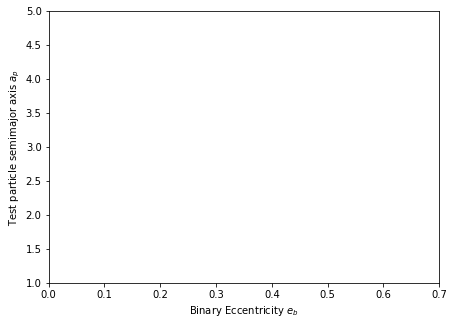

In [1]:
import numpy as np
from numpy import save
import rebound
import random
from multiprocessing import Pool
from myfunctions import Simulation
from myfunctions import Plotting0



if __name__ == "__main__":
    random.seed(1)
    Ne, Na, Nmu, Np = 4,4,2,2 #Np = number of test particles per (eb,ap)tuple #*******
    ab = 1
    ebs = np.linspace(0.,0.7,Ne)
    aps = ab*np.linspace(1.,5.,Na)
    mus = np.linspace(0.1,0.9,Nmu) #******
 
    params = [(eb,ap,Np,mu) for eb in ebs for ap in aps for mu in mus]
    #print(params[0:0])


    pool = rebound.InterruptiblePool(processes = 16) #add number of processors same as number requested on Sunnyvale

    # TO TIME ONE CALL TO THE METHOD
  
    
    stime = pool.map(Simulation.Simulation,params) #survival times
    #Print("Time elapsed is {}".format((end-start)/60.0))
    
    print(stime)
#   print(stime.shape)
    stime = np.array(stime).reshape([Nmu,Ne,Na,Np])
    stime = np.nan_to_num(stime)
    stime = stime.T
    print(stime)
    print(stime.shape)
    
    save('stime6.npy',stime)
    for i, mu in enumerate(mus):
        for j in range(0,Np):
            Plotting0.Plotting0(ebs,aps,Na,stime[i,:,:,j],mu) 
    
    
    
    
#     for i, mu in enumerate(mus):
#         Plotting0.Plotting0(ebs,aps,Na,stime[i,:,:],mu)#Calling Plotting()function in Plotting.py (in folder/module myfunctions)
#     for i, mu in enumerate(mus):
#         for j, np in enumerate(Np):
    #Plotting.Plotting(ebs,aps,Na,stime,mus,Np,Ne,Nmu)
    
#     for (i,j,k)in zip(mus,ebs,aps):
#         Plotting.Plotting(ebs,aps,Na,stime[i:j])
#         #for j in range(0,Np):
#         Plotting.Plotting(ebs,aps,Na,stime[i,:,:],mu)
